# **IMPORTANDO LIBRERIAS**

In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [2]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# **CARGANDO EL DATASET**

In [3]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,103894,103895,103896,103897,103898,103899,103900,103901,103902,103903
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,103894,103895,103896,103897,103898,103899,103900,103901,103902,103903
id,70172,5047,110028,24026,119299,111157,82113,96462,79485,65725,...,86549,66030,71445,102203,60666,94171,73097,68825,54173,62567
Gender,Male,Male,Female,Female,Male,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Male,Female,Male,Male,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,...,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer
Age,13,25,26,25,61,26,47,52,41,20,...,26,24,57,60,50,23,49,30,22,27
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,...,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business,Eco,Eco,Business,Business,Eco,...,Business,Eco,Eco,Business,Eco,Eco,Business,Business,Eco,Business
Flight Distance,460,235,1142,562,214,1180,1276,2035,853,1061,...,712,1055,867,1599,1620,192,2347,1995,1000,1723
Inflight wifi service,3,3,2,2,3,3,2,4,1,3,...,4,1,4,5,3,2,4,1,1,1
Departure/Arrival time convenient,4,2,2,5,3,4,4,3,2,3,...,4,1,5,5,1,1,4,1,1,3


# **DESCRIPCIÓN DE LAS CARACTERÍSTICAS**

**Gender:** Sexo. (Femenino, Masculino).

**Customer Type**: Tipo de cliente (Cliente leal, cliente desleal).

**Age**: Edad.

**Type of Travel**: Propósito del vuelo (Viaje personal, Viaje de negocios).

**Class**: Clase (Business, Eco, Eco Plus).

**Flight Distance**: La distancia de vuelo de este viaje.

**Inflight wifi service**: Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5).

**Departure/Arrival time convenient**: Nivel de satisfacción de la comodidad de la hora de salida/llegada.

**Ease of Online booking**: Nivel de satisfacción de la reserva en línea.

**Gate location:** Nivel de satisfacción con la ubicación de la puerta.

**Food and drink:** Nivel de satisfacción con la comida y la bebida.

**Online boarding:** Nivel de satisfacción del embarque en línea.

**Seat comfort:** Nivel de satisfacción de la comodidad de los asientos.

**Inflight entertainment:** Nivel de satisfacción del entretenimiento a bordo.

**On-board service:** Nivel de satisfacción del servicio a bordo.

**Leg room service:** Nivel de satisfacción del espacio entre los asientos.

**Baggage handling:** Grado de satisfacción del servicio de equipajes.

**Checkin service:** Nivel de satisfacción del servicio de facturación.

**Inflight service:** Nivel de satisfacción del servicio a bordo.

**Cleanliness:** Nivel de satisfacción de la limpieza.

**Departure Delay in Minutes:** Minutos de retraso en la salida.

**Arrival Delay in Minutes:** Minutos de retraso en la llegada.

**satisfaction:** Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción).

#**EDA**

**- CONOCIMIENTO BÁSICO DE LOS DATOS**

In [5]:
print("Dataset shape is: ",df.shape)

Dataset shape is:  (103904, 25)


In [6]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [7]:
#TIPOS DE DATOS
print("Data Types of features of Dataset is:")
print(df.dtypes)

Data Types of features of Dataset is:
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness      

Hay 5 variables categóricas(Gender, Customer type,Type of travell, Class y Satisfaction) y el resto son numéricas.

In [8]:
#MISSING VALUES
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Sólo Arrival Delay in minutes tiene nulos y son muy pocos.

In [9]:
#DUPLICADOS
print(f"Duplicates in Dataset is:{df.duplicated().sum()},({100*df.duplicated().sum()/len(df)})%")

Duplicates in Dataset is:0,(0.0)%


In [10]:
#CARDINALIDAD DE LAS VARIABLES
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

**TARGET**

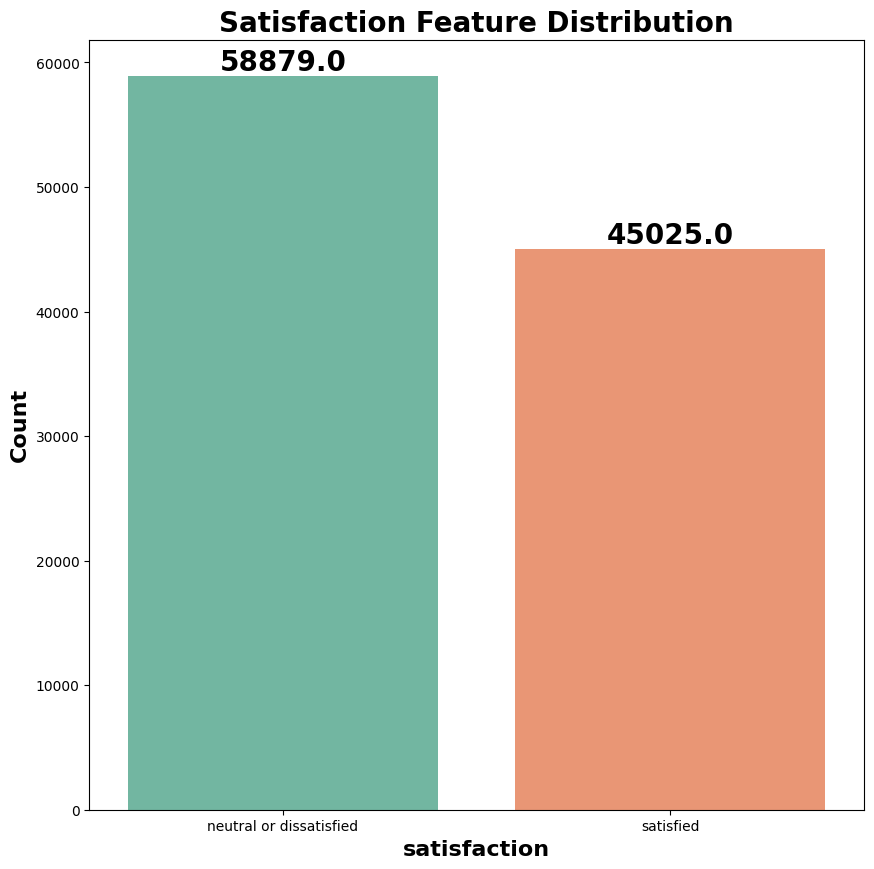

In [11]:
#TARGET satisfaction
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x="satisfaction", palette="Set2")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=20, fontweight='black', color='black', xytext=(0, 10), textcoords='offset points')
plt.title("Satisfaction Feature Distribution", fontsize=20, fontweight='bold')
plt.xlabel("satisfaction", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=16, fontweight='bold')
plt.show()